# Web Scraping and Introductory Data Analysis

Welcome to Homework 0, where we will delve into web scraping and perform an introductory data analysis. This homework will be a hands-on exercise that will help you become familiar with the process of extracting data from websites and conducting basic statistical analysis. 

## Objectives

By the end of this homework, you will be able to:

1. Set up a Python environment with the necessary libraries for web scraping and data analysis.
2. Write a web scraping script using Beautiful Soup and Selenium to collect data from a website.
3. Sample from the collected dataset and compare the statistics of the sample and the population.
   
## Tasks

1. **Environment Setup**: Install the required libraries such as Beautiful Soup, Selenium, pandas, numpy, matplotlib, and seaborn.

2. **Web Scraping**: Write a script to scrape transaction data from [Etherscan.io](https://etherscan.io/txs). Use Selenium to interact with the website and Beautiful Soup to parse the HTML content.

3. **Data Sampling**: Once the data is collected, create a sample from the dataset. Compare the sample statistics (mean and standard deviation) with the population statistics.


## Deliverables

1. A Jupyter notebook with all the code and explanations.
2. A detailed report on the findings, including the comparison of sample and population statistics.
Note: You can include the report in your notebook.

## Getting Started

Begin by setting up your Python environment and installing the necessary libraries. Then, proceed with the web scraping task, ensuring that you handle any potential issues such as rate limiting. Once you have the data, move on to the data sampling and statistical analysis tasks. 

Remember to document your process and findings in the Jupyter notebook, and to include visualizations where appropriate to illustrate your results. <br>
Good luck, and happy scraping!

## Data Collection (Etherscan)

In this section, we will use web scraping to gather transaction data from the Ethereum blockchain using the Etherscan block explorer. Our objective is to collect transactions from the **last 10 blocks** on Ethereum.

To accomplish this task, we will employ web scraping techniques to extract the transaction data from the Etherscan website. The URL we will be targeting for our data collection is:

[https://etherscan.io/txs](https://etherscan.io/txs)

### Steps

1. **Navigate to the URL**: Use Selenium to open the Etherscan transactions page in a browser.

2. **Locate the Transaction Data**: Identify the HTML elements that contain the transaction data for the specified block range.

3. **Extract the Data**: Write a script to extract the transaction details e.g. Hash, Method, Block, etc.

4. **Handle Pagination**: If the transactions span multiple pages, implement pagination handling to navigate through the pages and collect all relevant transaction data.

5. **Store the Data**: Save the extracted transaction data into a structured format, such as a CSV file or a pandas DataFrame, for further analysis.

### Considerations

- **Rate Limiting**: Be mindful of the website's rate limits to avoid being blocked. Implement delays between requests if necessary.
- **Dynamic Content**: The Etherscan website may load content dynamically. Ensure that Selenium waits for the necessary elements to load before attempting to scrape the data.
- **Data Cleaning**: After extraction, clean the data to remove any inconsistencies or errors that may have occurred during the scraping process.

### Resources

- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Selenium Documentation](https://selenium-python.readthedocs.io/)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Ethereum](https://ethereum.org/en/)

import necessary libraries

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
from io import StringIO

get FireFox Browser driver

In [2]:
driver = webdriver.Firefox()

define a function to wait for necessary dynamic contents like Age and Txn Fee titles to be displayed

In [3]:
def wait_until_age_title_be_displayed():
    age_title = driver.find_element(By.XPATH, "//a[@class='age-datetime-with-tooltip']")
    while not age_title.is_displayed():
        pass

def wait_until_txn_fee_title_be_displayed():
    txn_fee_title = driver.find_element(By.XPATH, "//a[@class='switch-txn-fee-gas-price']")
    while not txn_fee_title.is_displayed():
        pass

def wait_until_titles_be_displayed():
    wait_until_age_title_be_displayed()
    wait_until_txn_fee_title_be_displayed()

open Etherscan website and wait for necessary dynamic things

In [4]:
driver.get("https://etherscan.io/txs")

wait_until_titles_be_displayed()

click Age buttom to show time of transactions in Datetime Format to have better information about time of transactions

In [5]:
age_buttom = driver.find_element(By.CLASS_NAME, 'age-datetime-with-tooltip')
age_buttom.click()

Now, we want to figure out last enable block number

we do it with find last transaction block element and read its text

In [6]:
table_body = driver.find_element(By.XPATH, "//tbody[@class='align-middle text-nowrap']")
tabel_body_first_row = table_body.find_element(By.TAG_NAME, "tr")
first_row_block = tabel_body_first_row.find_elements(By.TAG_NAME, "td")[3]
block_buttom = first_row_block.find_element(By.TAG_NAME, "a")
last_block_num = int(block_buttom.text)

We define a function to handle pagination

if it can go to next page return True else return False

also we put one second sleep before clicking next page buttom because of rate limiting, but as we saw there isn't any need to it, so we commented it.

In [7]:
import time
from selenium.common.exceptions import NoSuchElementException

def go_next_page():
    try:
        next_page_buttom = driver.find_element(By.XPATH, "//a[@aria-label='Next']")
        # time.sleep(1)
        next_page_buttom.click()
        return True
    except NoSuchElementException:
        return False

This function when called on a page, reads its transactions table until last page.

here we read transactions table with pandas.read_html function. at first we used BeautifulSoup libarary to do it (as shown in next code block), but we figure out pandas can read it from page source directly, so change a code a little.

In [8]:
def get_transactions_table():
    wait_until_titles_be_displayed()
    transactions_table = pd.read_html(StringIO(driver.page_source))
    
    while go_next_page():
        wait_until_titles_be_displayed()
        transactions_table += pd.read_html(StringIO(driver.page_source))

    transactions_table = pd.concat(transactions_table, ignore_index=True)
    return transactions_table

at first we used BeautifulSoup libarary

In [9]:
# from bs4 import BeautifulSoup

# soup = BeautifulSoup(driver.page_source)
# soup_table = soup.find('table')
# transactions_table = pd.read_html(StringIO(str(soup_table)))

this function get a block number and then open its specific page and then read that block transactions.

Because of this way we don't have any duplicated data.

In [10]:
def get_block(block_num):
    driver.get(f"https://etherscan.io/txs?block={block_num}")
    transactions_table = get_transactions_table()
    return transactions_table

in this for loop we read 10 blocks transactions and close the browser

In [11]:
blocks = []
for i in range(10):
    blocks.append(get_block(last_block_num - i))
driver.quit()

output is like this

In [12]:
blocks[9]

,Unnamed: 0,Txn Hash,Method,Block,Date Time (UTC),From,Unnamed: 6,To,Value,Txn Fee
0,NaN,0x1ab6db9fe1254afaac74a44e0f1d69d370dcaffb2c6b...,Transfer,19393531,2024-03-08 22:59:35,0x8186b214...A30EE8810,NaN,0x5d0081A3...60aE5d394,0.112422227 ETH,0.001160
1,NaN,0x70879b829bc9737a5f03b82e07dd15c684e708365390...,Transfer,19393531,2024-03-08 22:59:35,0x4F3dA300...40773DaE5,NaN,SingularityDAO: SDAO Token,0 ETH,0.003667
2,NaN,0x0d5e1c359bf6bad9730d057779a9cae1891a117eedc6...,Transfer,19393531,2024-03-08 22:59:35,0x00B6A43c...644A69b79,NaN,Circle: USDC Token,0 ETH,0.003173
3,NaN,0xfec500fc2d07609501f3bef3f50205c5aadbe3047607...,Transfer,19393531,2024-03-08 22:59:35,0xCaC95e14...8B37B7Ef4,NaN,Wilder World: WILD Token,0 ETH,0.003525
4,NaN,0x92f845245ff5876b90dd93837e70533eef9cf2ea98c2...,Approve,19393531,2024-03-08 22:59:35,0x20799b0a...8b5892D91,NaN,Jarvis Network: JRT Token,0 ETH,0.001988
...,...,...,...,...,...,...,...,...,...,...
273,NaN,0x98ef1894fe446439aeb4443613a5f86ae50d5fc3a313...,0x5809d496,19393531,2024-03-08 22:59:35,0x315D2Ee4...04F8D9EbA,NaN,0x738e79fB...f61502221,0 ETH,0.010561
274,NaN,0xd14975e333a42da048588c7caa4cfcf29306f8141d0c...,0xff000000,19393531,2024-03-08 22:59:35,0x000000fF...810A640E8,NaN,0x5079FC00...E000008b6,0 ETH,0.064148
275,NaN,0xbc97bf130abf23925c2f10c063f7a3d72bc63ab4f57c...,Execute,19393531,2024-03-08 22:59:35,0x4b890FaC...F721D7b51,NaN,Uniswap: Universal Router,0 ETH,0.015971
276,NaN,0xd00815a96c9d9c198b9082a33bdd8605b7a7b1bb0dc6...,0x2f6f8019,19393531,2024-03-08 22:59:35,0x6686B1Ff...CcE09b11e,NaN,0xF67d5Fe8...EA6d58BC4,0.054989519 ETH,0.001622


## Data Analysis

Now that we have collected the transaction data from Etherscan, the next step is to perform conduct an initial analysis. This task will involve the following steps:

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by converting data types, removing any irrelevant information, and handling **duplicate** values.

3. **Statistical Analysis**: Calculate the mean and standard deviation of the population. Evaluate these statistics to understand the distribution of transaction values. The analysis and plotting will be on **Txn Fee** and **Value**.

4. **Visualization**: This phase involves the creation of visual representations to aid in the analysis of transaction values. The visualizations include:
    - A histogram for each data column, which provides a visual representation of the data distribution. The selection of bin size is crucial and should be based on the data's characteristics to ensure accurate representation. Provide an explanation on the bin size selection!
    - A normal distribution plot fitted alongside the histogram to compare the empirical distribution of the data with the theoretical normal distribution.
    - A box plot and a violin plot to identify outliers and provide a comprehensive view of the data's distribution.

### Deliverables

The project aims to deliver the following deliverables:

- A refined pandas DataFrame containing the transaction data, which has undergone thorough cleaning and is ready for analysis.
- A simple statistical analysis evaluating the population statistics, offering insights into the distribution of transaction values and fees.
- A set of visualizations showcasing the distribution of transaction values for the population. These visualizations include histograms, normal distribution plots, box plots, and violin plots, each serving a specific purpose in the analysis.

### Getting Started

The project starts with the importing of transaction data into a pandas DataFrame, setting the stage for data manipulation and analysis. Subsequent steps involve the cleaning of the data to ensure its quality and reliability. Followed by the calculation of population statistics. Finally, a series of visualizations are created to visually analyze the distribution of transaction values and fees.

because we don't need blocks separately so we concat them at first

In [13]:
transactions_table = pd.concat(blocks, ignore_index=True)

first column of table is for preview of the transactions details buttom so we don't need it

In [14]:
transactions_table.drop(transactions_table.columns[0], axis=1, inplace=True)

seventh column of the table shows that some of transactoins are SELF transaction,
but it don't have name, so we name it 'Is SELF' and set the value of those that are SELF to 'True' and the rest to 'False' 

In [15]:
transactions_table = transactions_table.rename(columns={'Unnamed: 6':'Is SELF'})
transactions_table = transactions_table.fillna(0)
transactions_table = transactions_table.astype({'Is SELF': bool})

Now, we want to change the type of Value column to float. first remove its unit and then remove any ',' character from it because in value greater than thousand there is a ',' between each three digit.

to don't miss its unit we add it to the column name

In [16]:
transactions_table['Value'] = transactions_table['Value'].apply(lambda value: float(value.split()[0].replace(',', '')))
transactions_table = transactions_table.rename(columns={'Value':'Value (ETH)'})

at first we got data from main page, but it was possible to miss some data and also had too many duplication. so we changed our alghorithm and collect data for each block separately from its own page. that's why out data don't have any duplications.

here we calculate mean and standard deviation for valuea and txn fees

In [17]:
value_mean = transactions_table['Value (ETH)'].mean()
value_std = transactions_table['Value (ETH)'].std()

print(f'Value mean:     {value_mean:.5f}')
print(f'Value std:      {value_std:.5f}')

txn_fee_mean = transactions_table['Txn Fee'].mean()
txn_fee_std = transactions_table['Txn Fee'].std()

print(f'Txn Fee mean:   {txn_fee_mean:.5f}')
print(f'Txn Fee std:    {txn_fee_std:.5f}')

Value mean:     1.77669
Value std:      20.83736
Txn Fee mean:   0.00574
Txn Fee std:    0.02446


ethereum transaction are very big data and they base on many parameters. they also have some parameters base on human decisions. it exists all over the world with any kinds of people. and some things like this.

Because of this breadth, it will be near to normal distrubiution as we conclude that from Central limit theorem.(it's possible it has some outliers)

import necessary libararies for visualization

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

at first when we drew value histogram, because of its many zeros, we saw a histogram with one tall column for zeros and the rest of data like a normal distrubiution.

so to have a better view of values and can fitt the histogram to normal plot better, we ignore the zero valuse.

but there was another problem. values were too near to zero. to solve it we get logarithm from them.

because our data wasn't constant, so we couldn't set constant bins for histogram. so we use numpy.histogram_bin_edges function with 'auto' estimator. this estimator is maximum of the ‘sturges’ and ‘Freedman Diaconis’ estimators.

Freedman Diaconis: Robust (resilient to outliers) estimator that takes into account data variability and data size.

sturges: R’s default method, only accounts for data size. Only optimal for gaussian data and underestimates number of bins for large non-gaussian datasets.

because out data is normal and has many outliers we used 'auto'

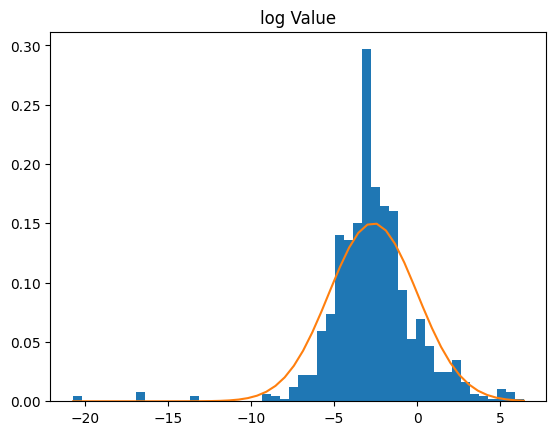

In [19]:
non_zero_values = transactions_table[transactions_table['Value (ETH)'] != 0]['Value (ETH)']
log_values = np.log(non_zero_values)
bins_values = np.histogram_bin_edges(log_values, bins='auto')
x_values = np.linspace(log_values.min(), log_values.max())

plt.hist(log_values, bins=bins_values, density=True)
plt.plot(x_values, norm.pdf(x_values, log_values.mean(), log_values.std()))
plt.title('log Value')

plt.show()

in Txn Fee we had another problem. like value got logarithm from them. but they were much closer to zero, so we decide to got another logarithm, but some of them were negetive. therefore we add them with minimum of them. by doing this the minimum equals to zero and the rest will be greater than zero. now we can get logarithm from them exept the minimum.

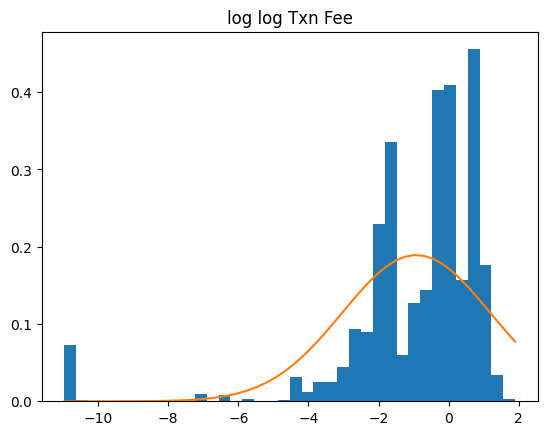

In [20]:
txn_fees = transactions_table['Txn Fee']
log_txn_fees = np.log(txn_fees)
log_txn_fees_shifted_to_positives = log_txn_fees - log_txn_fees.min()
log_log_txn_fees = np.log(log_txn_fees_shifted_to_positives[log_txn_fees_shifted_to_positives != 0])
bins_txn_fees = np.histogram_bin_edges(log_log_txn_fees, bins='auto')
x_txn_fees = np.linspace(log_log_txn_fees.min(), log_log_txn_fees.max())

plt.hist(log_log_txn_fees, bins=bins_txn_fees, density=True)
plt.plot(x_txn_fees, norm.pdf(x_txn_fees, log_log_txn_fees.mean(), log_log_txn_fees.std()))
plt.title('log log Txn Fee')

plt.show()

Draw box plot and violin plot

as we sea both data have many outliers. and also txn fee don't have normal distrubiution

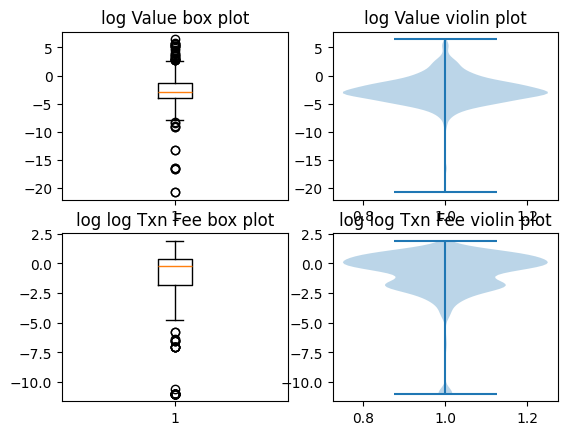

In [21]:
plt.subplot(221)
plt.boxplot(log_values)
plt.title('log Value box plot')

plt.subplot(222)
plt.violinplot(log_values)
plt.title('log Value violin plot')

plt.subplot(223)
plt.boxplot(log_log_txn_fees)
plt.title('log log Txn Fee box plot')

plt.subplot(224)
plt.violinplot(log_log_txn_fees)
plt.title('log log Txn Fee violin plot')

plt.show()

to have a better view for distrubiution of data, we definde a function to delete outliers with Tukey's fences method.

base on this method, then one could define an outlier to be any observation outside the range:



where k = 1.5 indicates an "outlier"

In [22]:
def remove_outliers(data, whis=1.5):
    data = np.array(data)
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    IQR = Q3 - Q1

    filtered_data_index = np.where(np.logical_and(data > Q1 - whis*IQR, data < Q3 + whis*IQR))
    return data[filtered_data_index]

as we sea in this case, values historram is fitted to normal distrubiution, but txn fee isn't that maybe shows that there is a classification for txn fees with two classes.

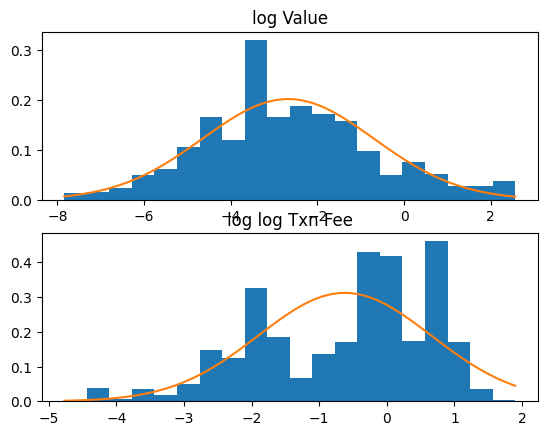

In [23]:
log_clean_values = remove_outliers(log_values)
log_log_clean_txn_fees = remove_outliers(log_log_txn_fees)

bins_clean_values = np.histogram_bin_edges(log_clean_values, bins='auto')
x_clean_values = np.linspace(log_clean_values.min(), log_clean_values.max())

bins_clean_txn_fees = np.histogram_bin_edges(log_log_clean_txn_fees, bins='auto')
x_clean_txn_fees = np.linspace(log_log_clean_txn_fees.min(), log_log_clean_txn_fees.max())

plt.subplot(211)
plt.hist(log_clean_values, bins=bins_clean_values, density=True)
plt.plot(x_clean_values, norm.pdf(x_clean_values, log_clean_values.mean(), log_clean_values.std()))
plt.title('log Value')

plt.subplot(212)
plt.hist(log_log_clean_txn_fees, bins=bins_clean_txn_fees, density=True)
plt.plot(x_clean_txn_fees, norm.pdf(x_clean_txn_fees, log_log_clean_txn_fees.mean(), log_log_clean_txn_fees.std()))
plt.title('log log Txn Fee')

plt.show()

## Data Sampling and Analysis

In this section, we will delve into the process of data sampling and perform an initial analysis on the transaction data we have collected. Our objective is to understand the distribution of transaction values by sampling the data and comparing the sample statistics with the population statistics.

### Steps

1. **Load the Data**: Import the collected transaction data into a pandas DataFrame.

2. **Data Cleaning**: Clean the data by handling missing values, converting data types, and removing any irrelevant information.

3. **Simple Random Sampling (SRS)**: Create a sample from the dataset using a simple random sampling method. This involves randomly selecting a subset of the data without regard to any specific characteristics of the data.

4. **Stratified Sampling**: Create another sample from the dataset using a stratified sampling method. This involves dividing the data into strata based on a specific characteristic (e.g., transaction value) and then randomly selecting samples from each stratum. Explain what you have stratified the data by and why you chose this column.

5. **Statistical Analysis**: Calculate the mean and standard deviation of the samples and the population. Compare these statistics to understand the distribution of transaction values.

6. **Visualization**: Plot the distribution of transaction values and fees for both the samples and the population to visually compare their distributions.

### Considerations

- **Sample Size**: The size of the sample should be large enough to represent the population accurately but not so large that it becomes impractical to analyze.
- **Sampling Method**: Choose the appropriate sampling method based on the characteristics of the data and the research question.

Explain the above considerations in your report.

we get random sample with size of 10% of population size, because of some researches it is an appropriate for alomost every sampling base on experiment

our sample size shouldn't be too small because it won't contain all necessary data from population and won't be a good representation of population.

also sample size shouldn't be too large, because we need independency between samples.

In [24]:
random_sample = transactions_table.sample(frac=0.1)

for stratified sampling we group our data base on Value column, because it is more important parameter and also as we saw it has normal distrubiution.

to group our data we use np.histogram_bin_edges function with 'auto' method as explained before.

(in this case because of our way to collect sample, our sample was either less than 5% of population when frac=0.1, so this time we changed it to frac=0.2)

In [25]:
bins = np.histogram_bin_edges(transactions_table['Value (ETH)'], bins='auto')
transactions_table['group'] = pd.cut(transactions_table['Value (ETH)'], bins=bins)
stratified_sample = transactions_table.groupby('group', group_keys=False).apply(lambda x: x.sample(frac=0.2))

/tmp/ipykernel_26018/1565913031.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified_sample = transactions_table.groupby('group', group_keys=False).apply(lambda x: x.sample(frac=0.2))


/tmp/ipykernel_26018/1565913031.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = transactions_table.groupby('group', group_keys=False).apply(lambda x: x.sample(frac=0.2))


here we calculate population and sampleing mean and standard deviation for Value and Txn Fee column.

as we see, mean and std of population is much bigger, because out data has much outliers with large values.

In [26]:
value_mean = transactions_table['Value (ETH)'].mean()
value_std = transactions_table['Value (ETH)'].std()

random_value_mean = random_sample['Value (ETH)'].mean()
random_value_std = random_sample['Value (ETH)'].std()

stratified_value_mean = stratified_sample['Value (ETH)'].mean()
stratified_value_std = stratified_sample['Value (ETH)'].std()

print(f'Population Value mean:          {value_mean:.5f}')
print(f'Random Sample Value mean:       {random_value_mean:.5f}')
print(f'Stratified Sample Value mean:   {stratified_value_mean:.5f}')
print('\n')
print(f'Population Value std:           {value_std:.5f}')
print(f'Random Sample Value std:        {random_value_std:.5f}')
print(f'Stratified Sample Value std:    {stratified_value_std:.5f}')

Population Value mean:          1.77669
Random Sample Value mean:       1.96364
Stratified Sample Value mean:   1.80426


Population Value std:           20.83736
Random Sample Value std:        18.31364
Stratified Sample Value std:    20.08339


In [27]:
txn_fee_mean = transactions_table['Txn Fee'].mean()
txn_fee_std = transactions_table['Txn Fee'].std()

random_txn_fee_mean = random_sample['Txn Fee'].mean()
random_txn_fee_std = random_sample['Txn Fee'].std()

stratified_txn_fee_mean = stratified_sample['Txn Fee'].mean()
stratified_txn_fee_std = stratified_sample['Txn Fee'].std()

print(f'Population Txn Fee mean:        {txn_fee_mean:.5f}')
print(f'Random Sample Txn Fee mean:     {random_txn_fee_mean:.5f}')
print(f'Stratified Sample Txn Fee mean: {stratified_txn_fee_mean:.5f}')
print('\n')
print(f'Population Txn Fee std:         {txn_fee_std:.5f}')
print(f'Random Sample Txn Fee std:      {random_txn_fee_std:.5f}')
print(f'Stratified Sample Txn Fee std:  {stratified_txn_fee_std:.5f}')

Population Txn Fee mean:        0.00574
Random Sample Txn Fee mean:     0.00552
Stratified Sample Txn Fee mean: 0.00311


Population Txn Fee std:         0.02446
Random Sample Txn Fee std:      0.00943
Stratified Sample Txn Fee std:  0.00398


now for draw their plot we do as same as polulation and delete zeros then get logarithm from samples values

as we can see, histogram of stratified sample is much closer to population histogram than random sample.

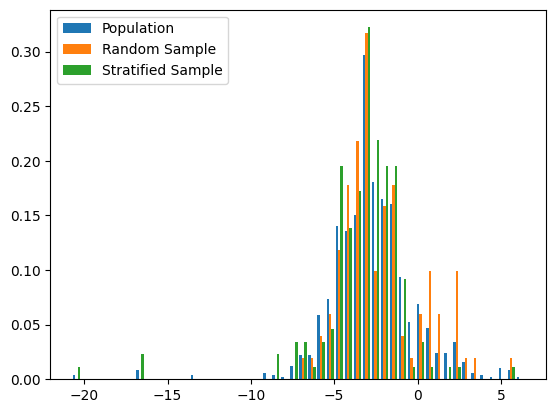

In [28]:
non_zero_random_values = random_sample[random_sample['Value (ETH)'] != 0]['Value (ETH)']
log_random_values = np.log(non_zero_random_values)

non_zero_stratified_values = stratified_sample[stratified_sample['Value (ETH)'] != 0]['Value (ETH)']
log_stratified_values = np.log(non_zero_stratified_values)

plt.hist([log_values, log_random_values, log_stratified_values], bins=bins_values, density=True, label=['Population', 'Random Sample', 'Stratified Sample'])

plt.legend()
plt.show()

in this case we do the same thing.

the result shows that stratified sampling is better than random sampling.

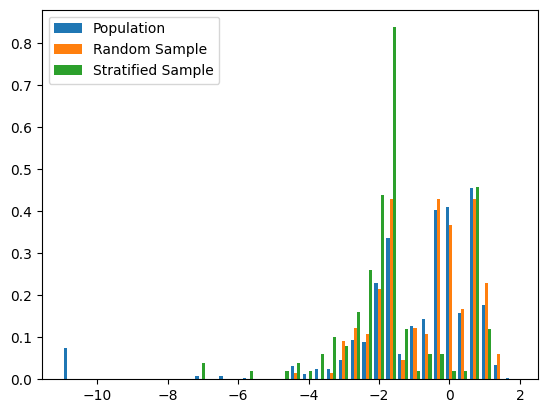

In [29]:
non_zero_random_txn_fees = random_sample[random_sample['Txn Fee'] != 0]['Txn Fee']
log_random_txn_fees = np.log(non_zero_random_txn_fees)
log_random_txn_fees_shifted_to_positives = log_random_txn_fees - log_random_txn_fees.min()
log_log_random_txn_fees = np.log(log_random_txn_fees_shifted_to_positives[log_random_txn_fees_shifted_to_positives != 0])

non_zero_stratified_txn_fees = stratified_sample[stratified_sample['Txn Fee'] != 0]['Txn Fee']
log_stratified_txn_fees = np.log(non_zero_stratified_txn_fees)
log_stratified_txn_fees_shifted_to_positives = log_stratified_txn_fees - log_stratified_txn_fees.min()
log_log_stratified_txn_fees = np.log(log_stratified_txn_fees_shifted_to_positives[log_stratified_txn_fees_shifted_to_positives != 0])


plt.hist([log_log_txn_fees, log_log_random_txn_fees, log_log_stratified_txn_fees], bins=bins_txn_fees, density=True, label=['Population', 'Random Sample', 'Stratified Sample'])

plt.legend()
plt.show()

### 1. What are some potential limitations when using web scraping for data collection? Specifically, what problems did you face while fetching data from Etherscan? What problems can these limitations cause in your analysis?

1. Moving between pages to find the next block: In this case, when we went to the next page, there were some transactions from the previous page on this page. We solved this problem by changing the pagination algorithm method.
Data duplicates our output statistics
2. The presence of a different IP caused the site to recognize the robot and we were unable to continue scraping. that this challenge could be solved with stable internet access.
3. The site notifications that were placed on the table elements also caused disruption during scraping

### 2. What can make your analysis untrustworthy? What are your solutions?

Incorrect or uncleaned data, as well as data duplication or data loss.
For wrong data, we must first know the data we are working with. and remove outlier data.
Or, to sample without removing zero values, we should have BIOS sampling and have only sampled a specific data, the solution of which is to use the appropriate sampling method.

### 3. How did the visualization help you in understanding the data? What could you interpret from the plots?

The use of visualization helped in understanding the data in several ways. Firstly, it simplified complex data by representing it in a more easily digestible format. Instead of dealing with raw numbers or extensive tables, visual elements such as charts, graphs, or diagrams provided a visual representation that made it easier to grasp the information at a glance.

Secondly, visualization highlighted patterns and trends in the data. By presenting the data visually, it became easier to identify recurring patterns, trends, or anomalies that may not have been immediately apparent when looking at the raw data. Visualizations can effectively convey the relationships and dependencies between different variables, allowing analysts to identify correlations or causations.

Lastly, visualization facilitated comparison of different data points or groups. By presenting the data visually, it became straightforward to compare and contrast different data sets or categories. This enabled analysts to identify similarities, differences, or relationships between various elements, which could further aid in drawing conclusions or making informed decisions based on the insights gained from the visualization.

### 4. How do the two sampling methods differ in their output? Compare these and explain which one is a better fit to the population.

Simple sampling and stratified sampling are two different methods used in statistics to select a subset of individuals from a statistical population to estimate characteristics of the whole population. They differ in their approach and the type of data they are best suited for.

Simple Sampling

Definition: In simple sampling, each member of the population has an equal chance of being selected. This method is straightforward and does not require knowledge of the population's structure.

Output: The output of simple sampling is a random sample that is representative of the population in terms of the characteristics being measured. However, it does not take into account any potential stratification within the population.
Best Fit: Simple sampling is best suited for populations that are homogeneous or when the goal is to ensure that each member has an equal chance of being selected. It is not the best choice for populations that are stratified or when the goal is to ensure that each stratum is adequately represented in the sample.

Stratified Sampling

Definition: Stratified sampling involves dividing the population into subgroups (strata) based on a specific characteristic, and then taking a simple random sample from each stratum. This method ensures that each stratum is adequately represented in the sample.

Output: The output of stratified sampling is a sample that is more representative of the population than a simple random sample, especially when the population is stratified. This method is particularly useful when the population is divided into distinct groups, and the goal is to ensure that each group is adequately represented in the sample.

Best Fit: Stratified sampling is the better choice when the population is stratified, as it ensures that each stratum is adequately represented in the sample. This can lead to more accurate conclusions about the population.
Comparison and Conclusion

Representativeness: Stratified sampling is generally more representative of the population than simple sampling, especially when the population is stratified. This is because it ensures that each stratum is adequately represented in the sample.
Complexity: Stratified sampling is more complex than simple sampling because it requires knowledge of the population's structure and the ability to divide the population into strata.

In conclusion, the choice between simple sampling and stratified sampling depends on the characteristics of the population and the goals of the study. Stratified sampling is generally a better fit for populations that are stratified, as it ensures that each stratum is adequately represented in the sample, leading to more accurate conclusions about the population.